<a href="https://colab.research.google.com/github/SeanBarnier/HAFS_Air-Sea/blob/main/tempMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set up environment

In [2]:
!pip install cfgrib
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 71.9 MB/s eta 0:00:00


In [3]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cft
from datetime import datetime as dt
import cfgrib

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#User parameters

In [4]:
name = "Milton"
tcNum = "14"
trackType = ""

initTime = dt(year=2024, month=10, day=6, hour=0) #Time when Milton began its most rapid intensification

fHourStep = 12      #Normally 3 for HAFS-A
forecastLength = 48 #Normally 126 for HAFS-A.
#runStep = 6         #Normally 6 for HAFS-A

figureSuffix = "_RI"
subfolder = "RI/"
dataPath = "/content/drive/MyDrive/savedData/"
figurePath = "/content/drive/MyDrive/figures/"

stormCentered = True
potentialTemp = True #Use atmospheric potential temperature instead of in-situ temperature

atmTop = 850
oceFloor = 100

Get ATCF data and find interested point

#Retrieve HAFS-A Data

Find times needed

In [5]:
dateFormat = "%Y-%m-%d %H:%M:%S"
runFormat = "%Y%m%d%H"

fcastTimes = [] #Key: initiation, item: valid time list
fhour = 0
validTime = initTime

while fhour <= forecastLength:
    fcastTimes.append(validTime)
    validTime += pd.Timedelta(hours=fHourStep)
    fhour += fHourStep

Find storm location in HAFS-A from ATCF files. Used to find along-storm profile.

In [6]:
cols = ["BASIN", "CY", "YYYYMMDDHH", "TECHNUM/MIN", "TECH", "TAU", "LatN/S", "LonE/W",
    "VMAX", "MSLP", "TY", "RAD", "WINDCODE", "RAD1", "RAD2", "RAD3", "RAD4",
    "POUTER", "ROUTER", "RMW", "GUSTS", "EYE", "SUBREGION", "MAXSEAS", "INITIALS",
    "DIR", "SPEED", "STORMNAME", "DEPTH", "SEAS", "SEASCODE", "SEAS1", "SEAS2",
    "SEAS3", "SEAS4", "USERDEFINED1", "Thermo1", "Thermo2", "Thermo3", "Thermo4",
    "Thermo5", "Thermo6", "Thermo7", "USERDEFINED2", "DT", "SHR82", "SHR81_1",
    "SHR82_2",  "USERDEFINED3", "SST", "USERDEFINED4", "ARMW1", "ARMW2"]

initStr, initHour = initTime.strftime("%Y%m%d_%H").split("_")

atcfURL = f"https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/{initStr}/{initHour}/{tcNum}l.{initStr}{initHour}.hfsa.trak.atcfunix"
atcfFile = "atcf_" + initStr + "_" + initHour + ".csv"

!wget -O {atcfFile} {atcfURL}
atcf = pd.read_csv(atcfFile, names=cols)

--2025-07-09 19:48:30--  https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241006/00/14l.2024100600.hfsa.trak.atcfunix
Resolving noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)... 3.5.28.145, 52.217.229.17, 52.216.54.113, ...
Connecting to noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)|3.5.28.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33522 (33K) [application/octet-stream]
Saving to: ‘atcf_20241006_00.csv’

atcf_20241006_00.cs 100%[===================>]  32.74K  --.-KB/s    in 0.02s   

2025-07-09 19:48:30 (1.67 MB/s) - ‘atcf_20241006_00.csv’ saved [33522/33522]



In [7]:
tcLocs = {}

for valid in fcastTimes:
    fHour = int((valid-initTime).total_seconds() / 3600)

    pointLat = int(atcf[atcf.TAU==fHour]["LatN/S"].iloc[0].replace("N", ""))/10
    pointLon = int(atcf[atcf.TAU==fHour]["LonE/W"].iloc[0].replace("W", ""))/-10 #Assume western hemisphere
    tcLocs[valid] = (pointLat, pointLon)

#Figures

STILL NEED TO FIX COLORBARS

In [159]:
lonMin, lonMax, latMin, latMax = -95, -80, 20, 30

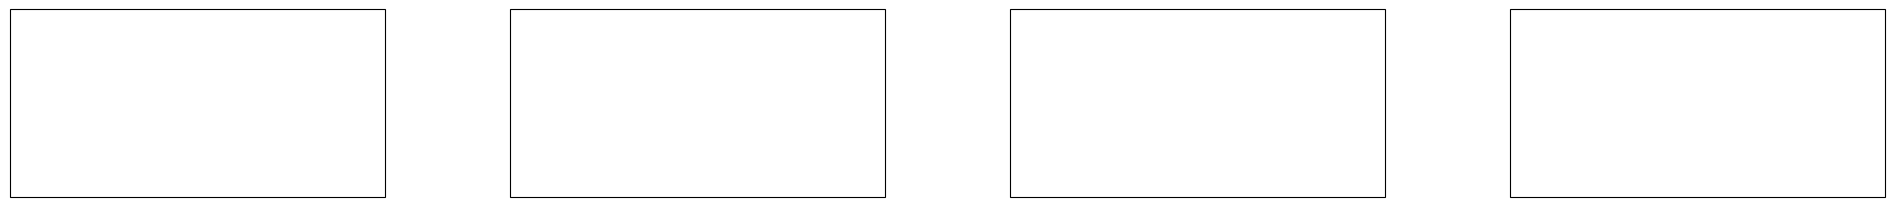

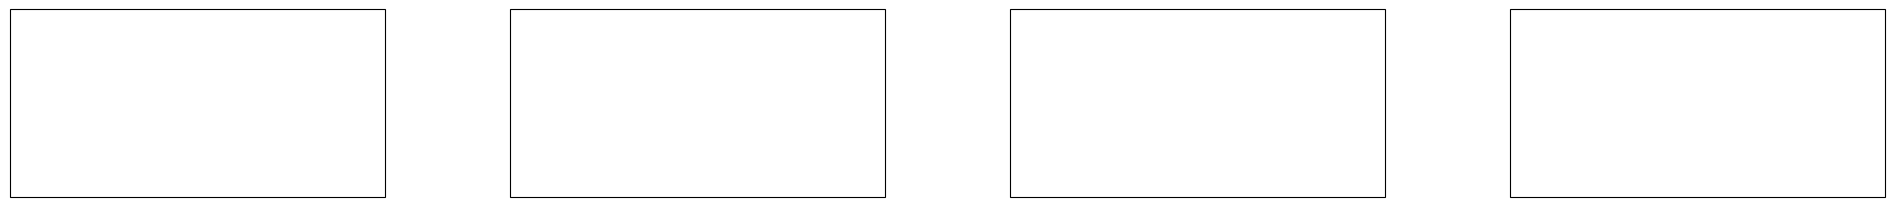

In [160]:
atmFig = plt.figure(figsize=(25,5))
oceFig = plt.figure(figsize=(25,5))

axWidth = 1 / len(fcastTimes)
atmAxes = [atmFig.add_axes([xcorner,0.1, axWidth-0.05, 0.5], projection=ccrs.PlateCarree()) for xcorner in np.arange(0.1,0.9,axWidth)]
oceAxes = [oceFig.add_axes([xcorner,0.1, axWidth-0.05, 0.5], projection=ccrs.PlateCarree()) for xcorner in np.arange(0.1,0.9,axWidth)]

In [161]:
initStr = initTime.strftime("%Y%m%d%H")
atmLayer = 1000.0

for valid, atmAx in zip(fcastTimes, atmAxes):

  fhour = str(int((valid-initTime).total_seconds() / 3600))
  while len(fhour) < 3: fhour = "0" + fhour

  atmFile = "hafsa_" + initStr + "_f" + fhour + ".nc"
  atmPath = dataPath + "hafsaOutput/" + subfolder + atmFile
  atmData = xr.open_dataset(atmPath)
  atmSlice = atmData.sel(isobaricInhPa=atmLayer, longitude=slice(lonMin+360, lonMax+360), latitude=slice(latMin, latMax))

  tempContour = atmAx.contourf(atmSlice.longitude.data, atmSlice.latitude.data, atmSlice.t.data, transform=ccrs.PlateCarree(),
                               extent = [lonMin, lonMax, latMin, latMax], cflevs=np.arange(290, 310, 2))
  atmFig.colorbar(tempContour, label="Temperature (K)", shrink=0.7)

  atmAx.add_feature(cft.COASTLINE)
  atmAx.add_feature(cft.BORDERS)
  atmAx.gridlines(draw_labels=["left", "bottom"])
  atmAx.set_title(valid.strftime("%Y-%m-%d %HUTC"))

atmFig.suptitle(f"Atmosphere Temperature at {atmLayer} hPa (Initialized {initTime.strftime('%Y-%m-%d %HUTC')})")

/tmp/ipython-input-161-3620957765.py:11: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  atmData = xr.open_dataset(atmPath)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'cflevs'
  result = super().contourf(*args, **kwargs)
/tmp/ipython-input-161-3620957765.py:11: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  atmData = xr.open_dataset(atmPath)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'cflevs'
  result = super().contourf(*args, **kwargs)
/tmp/ipython-input-161-3620957765.py:11: FutureWarning: In a future version of xar

Text(0.5, 0.98, 'Atmosphere Temperature at 1000.0 hPa (Initialized 2024-10-06 00UTC)')

In [162]:
oceLayer = 1.0

for valid, oceAx in zip(fcastTimes, oceAxes):

  initStr = initTime.strftime("%Y%m%d%H")

  fhour = str(int((valid-initTime).total_seconds() / 3600))
  while len(fhour) < 3: fhour = "0" + fhour

  oceFile = "mom6_" + initStr + "_f" + fhour + ".nc"
  ocePath = dataPath + "mom6Output/" + subfolder + oceFile
  oceData = xr.open_dataset(ocePath, decode_times=False)
  oceSlice = oceData.sel(z_l=oceLayer, xh=slice(lonMin, lonMax), yh=slice(latMin, latMax), time=oceData.time.data[0])

  tempContour = oceAx.contourf(oceSlice.xh.data, oceSlice.yh.data, oceSlice.temp.data + 273.15, transform=ccrs.PlateCarree(),
                               extent=[lonMin, lonMax, latMin, latMax], cflevs=np.arange(290, 310, 2))
  oceFig.colorbar(tempContour, label="Temperature (K)", shrink=0.7)

  oceAx.add_feature(cft.COASTLINE)
  oceAx.add_feature(cft.BORDERS)
  oceAx.gridlines(draw_labels=["left", "bottom"])
  oceAx.set_title(valid.strftime("%Y-%m-%d %HUTC"))

oceFig.suptitle(f"Ocean Temperature at {oceLayer} m (Initialized {initTime.strftime('%Y-%m-%d %HUTC')})")

/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'cflevs'
  result = super().contourf(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'cflevs'
  result = super().contourf(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'cflevs'
  result = super().contourf(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'cflevs'
  result = super().contourf(*args, **kwargs)


Text(0.5, 0.98, 'Ocean Temperature at 1.0 m (Initialized 2024-10-06 00UTC)')

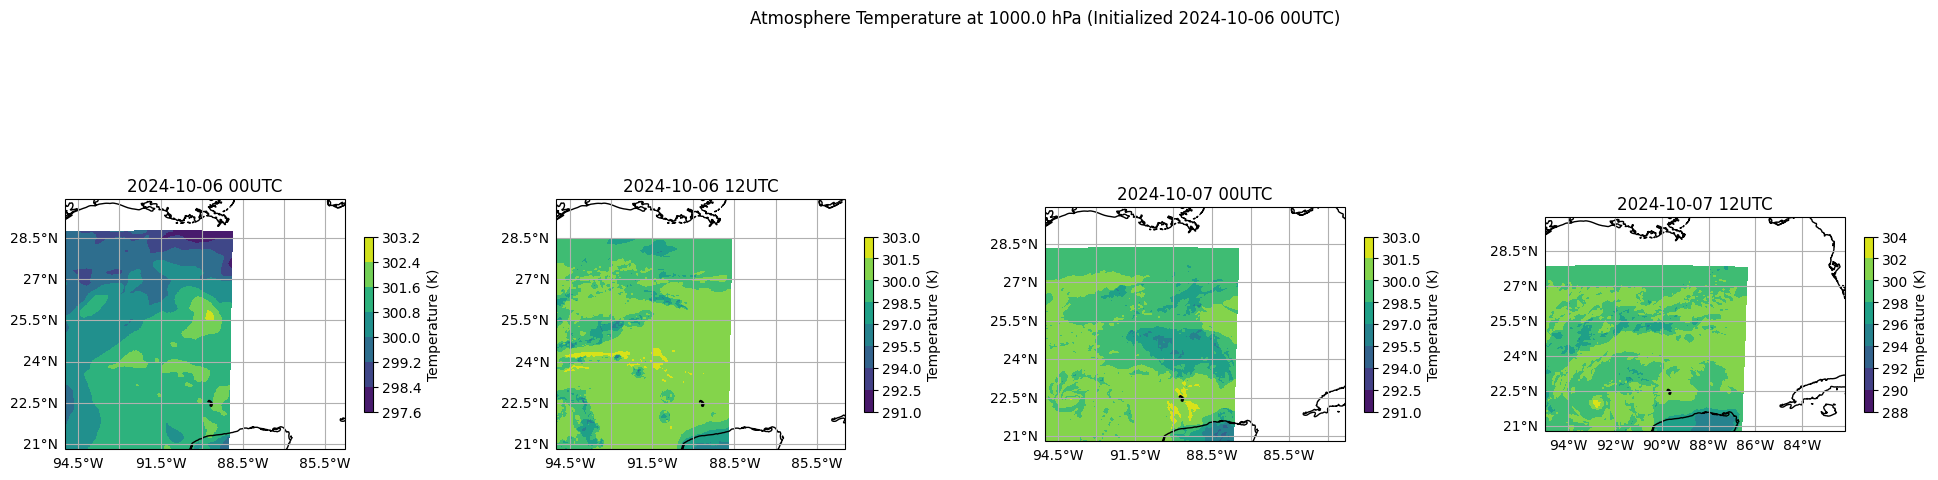

In [163]:
atmFig

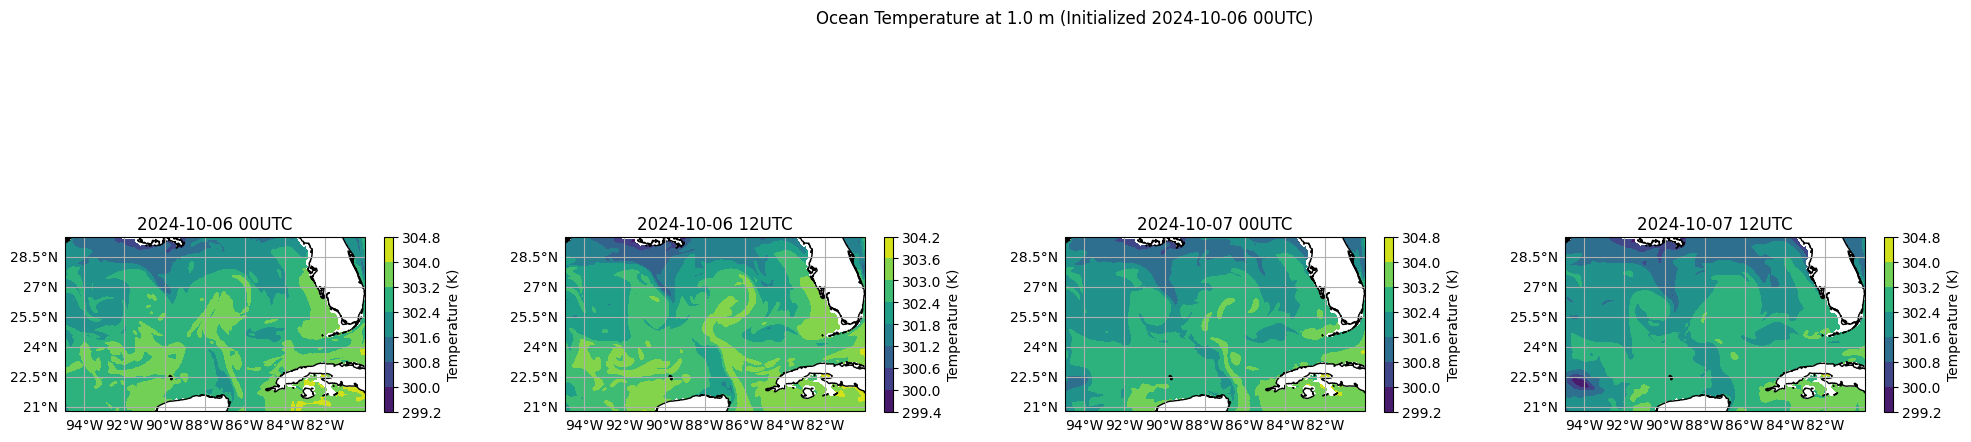

In [164]:
oceFig